In [1]:
from sklearn.datasets import make_blobs
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

# 載入資料集

In [2]:
x, y = make_blobs(centers=5, n_samples=500, n_features=3)

# 顯示資料分佈

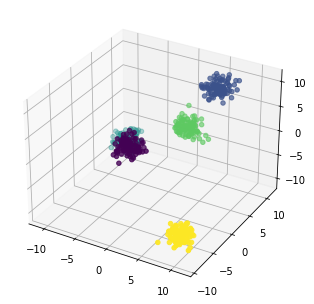

In [3]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=y)

# 主要算法實現

In [4]:
class Cluster:
    def __init__(self, centroid):
        self.centroid = centroid
        self.member = []

    def dist(self, sample):
        return np.linalg.norm(sample - self.centroid)

    def update_centroid(self):
        self._old_centroid = self.centroid
        self.centroid = np.mean(self.member, axis=0)
        self.member = []

    @property
    def converged(self):
        return np.array_equal(self.centroid, self._old_centroid)

In [10]:
class KMeans:
    """
    無監督式分類
    首先初始化簇並隨機從樣本選取中心點
    接著將樣本依據歐式距離(或其他距離)分類至各個簇
    所有樣本分類一輪後
    各個簇依據其成員(即剛分類的樣本)計算出新的中心
    再以新的中心繼續以距離作分類
    如此不斷往復直至中心不再改變位置(即成員不再變動)
    """
    def __init__(self, n_clusters, max_iters):
        self.n_clusters = n_clusters
        self.max_iters = max_iters

    def predict(self, x):
        # 初始化各簇
        random_idxs = np.random.choice(len(x), self.n_clusters, replace=False)
        init_centroids = x[random_idxs]
        clusters = [ Cluster(centroid) for centroid in init_centroids]

        for step in range(self.max_iters):
            # 將各樣本分類至各簇
            for sample in x:
                closest_cluster = min(clusters, key=lambda cluster: cluster.dist(sample))
                closest_cluster.member.append(sample)

            self._plot_step(clusters)

            # 各簇以新成員更新中心
            for cluster in clusters:
                cluster.update_centroid()

            # 若各簇的中心已收斂則提早結束
            if all([ cluster.converged for cluster in clusters ]):
                break

        return clusters

    def _plot_step(self, clusters):
        fig = plt.figure()
        ax = Axes3D(fig)
        for cluster in clusters:
            member = np.array(cluster.member)
            ax.scatter(member[:, 0], member[:, 1], member[:, 2])
        plt.show()

# 可視化驗證

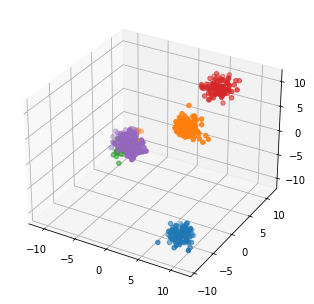

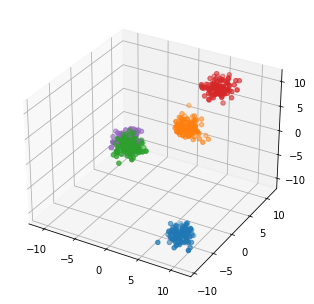

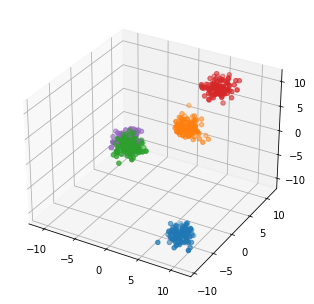

In [12]:
kmeans = KMeans(n_clusters=5, max_iters=500)
clusters = kmeans.predict(x)